In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [2]:
red = pd.read_csv("winequality-red.csv", delimiter = ";")
white = pd.read_csv("winequality-white.csv", delimiter = ";")

In [3]:
red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [5]:
red['wine_type'] = 'red'
white['wine_type'] = 'white'
wines = pd.concat([red, white], axis=0)

wines.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [6]:
X = wines.drop(columns=['quality', 'wine_type']) 
y_quality = wines['quality']                     
y_type = wines['wine_type']                      

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_quality, test_size=0.3, random_state=42)
knn_quality = KNeighborsClassifier(n_neighbors=5)
knn_quality.fit(X_train, y_train)

y_pred_quality = knn_quality.predict(X_test)
print("Classification Report for Quality Prediction:")
print(classification_report(y_test, y_pred_quality, zero_division=0))

Classification Report for Quality Prediction:
              precision    recall  f1-score   support

           3       0.17      0.11      0.13         9
           4       0.23      0.13      0.17        69
           5       0.54      0.65      0.59       613
           6       0.58      0.57      0.58       894
           7       0.50      0.43      0.46       315
           8       0.32      0.12      0.18        49
           9       0.00      0.00      0.00         1

    accuracy                           0.54      1950
   macro avg       0.33      0.29      0.30      1950
weighted avg       0.53      0.54      0.54      1950



In [7]:
# Exclude regulated features (update the list as per regulations)
regulated_features = ['citric acid', 'chlorides']  # Example
X_unregulated = wines.drop(columns=['quality', 'wine_type'] + regulated_features)

# Normalize features
X_unregulated_scaled = scaler.fit_transform(X_unregulated)

# Train-test split
X_train_type, X_test_type, y_train_type, y_test_type = train_test_split(X_unregulated_scaled, y_type, test_size=0.3, random_state=42)

# kNN classifier
knn_type = KNeighborsClassifier(n_neighbors=5)
knn_type.fit(X_train_type, y_train_type)

# Predictions and evaluation
y_pred_type = knn_type.predict(X_test_type)
print("Classification Report for Wine Type Prediction:")
print(classification_report(y_test_type, y_pred_type))

Classification Report for Wine Type Prediction:
              precision    recall  f1-score   support

         red       0.97      0.98      0.98       502
       white       0.99      0.99      0.99      1448

    accuracy                           0.99      1950
   macro avg       0.98      0.99      0.98      1950
weighted avg       0.99      0.99      0.99      1950



In [8]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_scaled, y_quality)
importance = pd.Series(rf.feature_importances_, index=wines.drop(columns=['quality', 'wine_type']).columns)
print(importance.sort_values(ascending=False))

alcohol                 0.123531
density                 0.103229
volatile acidity        0.100498
total sulfur dioxide    0.091670
chlorides               0.087901
sulphates               0.086368
free sulfur dioxide     0.086210
pH                      0.084298
residual sugar          0.083807
citric acid             0.077567
fixed acidity           0.074921
dtype: float64


<Axes: xlabel='wine_type', ylabel='volatile acidity'>

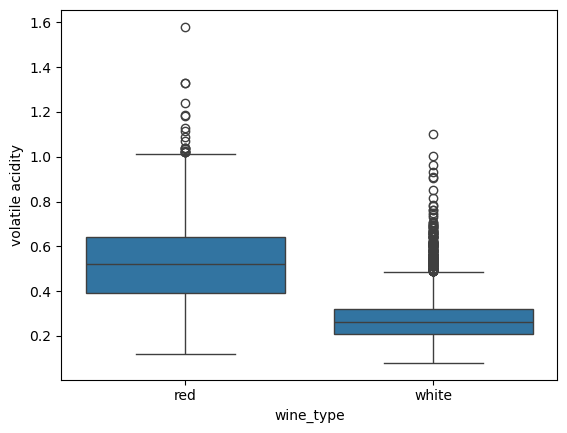

In [9]:
sns.boxplot(x='wine_type', y='volatile acidity', data=wines)

C:\Users\magca\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\magca\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\magca\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


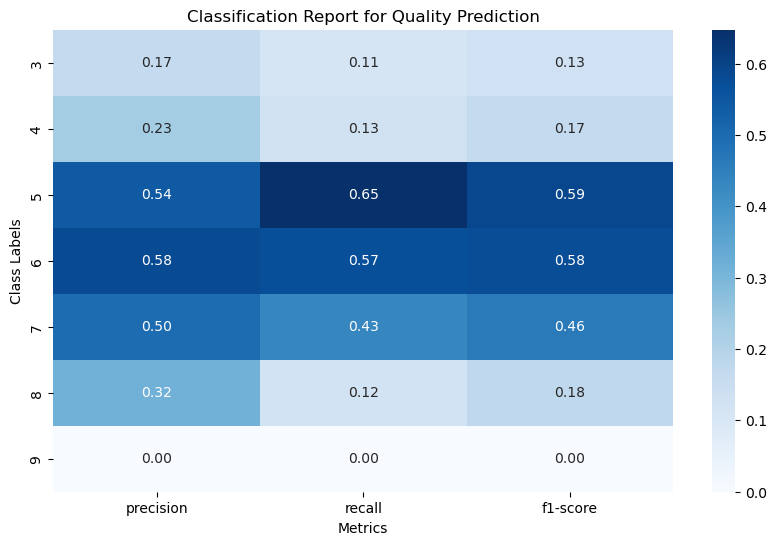

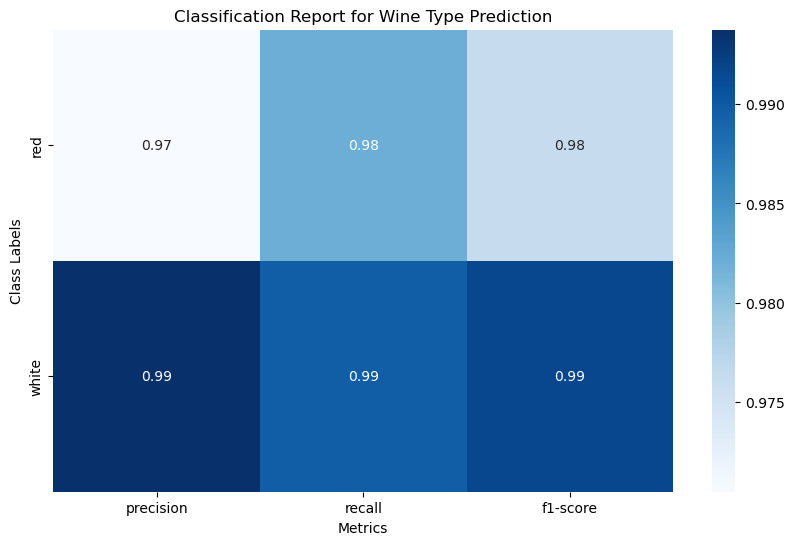

In [10]:
knn_quality = KNeighborsClassifier(n_neighbors=5)
knn_quality.fit(X_train, y_train)

y_pred = knn_quality.predict(X_test)

report_quality = classification_report(y_test, y_pred, output_dict=True)
df_quality = pd.DataFrame(report_quality).transpose()

report_type = classification_report(y_test_type, y_pred_type, output_dict=True)
df_type = pd.DataFrame(report_type).transpose()

def plot_classification_report(df, title):
    df_filtered = df.drop(index=["accuracy", "macro avg", "weighted avg"], errors='ignore')

    plt.figure(figsize=(10, 6))
    sns.heatmap(df_filtered.iloc[:, :-1], annot=True, fmt=".2f", cmap="Blues", cbar=True)
    plt.title(title)
    plt.ylabel("Class Labels")
    plt.xlabel("Metrics")
    plt.show()

plot_classification_report(df_quality, "Classification Report for Quality Prediction")

plot_classification_report(df_type, "Classification Report for Wine Type Prediction")